# 강남에는 피부과와 성형외과가 다른지역보다 많을까???
* 스스로 한번해보는 미니 분석 프로젝트!!

## 공공데이터포털에서 데이터받아오기

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [5]:
df = pd.read_csv('C:/Users/82109/data_setting/data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv',encoding='cp949')

## 데이터 가공하기

### 결측치 많은 것  처리하기

In [6]:
#결측치 많은 columns 찾아서 리스트로 만들기
drop_columns = df.isnull().sum().sort_values(ascending = False).head(10).index
drop_columns = drop_columns.tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [7]:
df = df.drop(drop_columns, axis= 1)
df

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,4.130000e+11,경기도 안산시 단원구 달미로,10,4.130000e+24,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,경기도,41390.0,...,경기도 시흥시 정왕동 1740-1,4.140000e+11,경기도 시흥시 중심상가로,178,4.140000e+24,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955
3,20350610,한귀원정신과의원,S,의료,S01,병원,S01B99,기타병원,부산광역시,26500.0,...,부산광역시 수영구 광안동 74-1,2.650000e+11,부산광역시 수영구 수영로,688,2.650000e+24,부산광역시 수영구 수영로 688,613100.0,48266.0,129.115438,35.166872
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,대전광역시,30170.0,...,대전광역시 서구 둔산동 1507,3.020000e+11,대전광역시 서구 문예로,67,3.020000e+24,대전광역시 서구 문예로 67,302831.0,35240.0,127.389865,36.352728
91331,16192180,리원,S,의료,S07,의료관련서비스업,S07A07,산후조리원,경기도,41281.0,...,경기도 고양시 덕양구 화정동 1146,4.130000e+11,경기도 고양시 덕양구 성신로,14,4.130000e+24,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,126.830144,37.627530
91332,16127538,참좋은요양병원,S,의료,S01,병원,S01B17,노인/치매병원,부산광역시,26410.0,...,부산광역시 금정구 장전동 538-1,2.640000e+11,부산광역시 금정구 금강로,209,2.640000e+24,부산광역시 금정구 금강로 209,609841.0,46294.0,129.082790,35.227138
91333,16108681,경희중앙한의원,S,의료,S01,병원,S01B06,한의원,서울특별시,11740.0,...,서울특별시 강동구 길동 345-9,1.170000e+11,서울특별시 강동구 천중로,213,1.170000e+24,서울특별시 강동구 천중로 213,134811.0,5303.0,127.143958,37.540993


In [8]:
df_1 = df[df['상권업종소분류명']=='정형/성형외과']

In [9]:
# 정형/성형외과에서 정형외과는 걸러내기
drop_Orthopedics = df_1[df_1['상호명'].str.contains('정형')].index
drop_Orthopedics = drop_Orthopedics.tolist()
drop_Orthopedics

[47,
 210,
 714,
 879,
 914,
 941,
 965,
 1061,
 1064,
 1140,
 1150,
 1244,
 1271,
 1291,
 1755,
 1823,
 1913,
 1956,
 2124,
 2139,
 2158,
 2507,
 2508,
 2583,
 2614,
 2661,
 2864,
 2889,
 3103,
 3105,
 3127,
 3276,
 3371,
 3381,
 3509,
 3661,
 3796,
 3818,
 3830,
 4078,
 4101,
 4105,
 4110,
 4189,
 4211,
 4221,
 4274,
 4308,
 4442,
 4651,
 4733,
 4734,
 4768,
 5180,
 5256,
 5284,
 5317,
 5326,
 5345,
 5370,
 5384,
 5386,
 5390,
 5436,
 5452,
 5473,
 5620,
 5621,
 5823,
 5842,
 5937,
 6043,
 6069,
 6433,
 6447,
 6575,
 6725,
 6977,
 6991,
 7117,
 7287,
 7562,
 7620,
 7698,
 7882,
 8275,
 8531,
 8815,
 9548,
 9652,
 9942,
 10121,
 10515,
 10596,
 11264,
 11693,
 12016,
 12472,
 12484,
 13643,
 13985,
 14502,
 14794,
 14796,
 14816,
 15004,
 15035,
 15224,
 15354,
 15559,
 15683,
 15716,
 15721,
 15846,
 15866,
 15881,
 15918,
 16069,
 16441,
 16503,
 16509,
 16750,
 16870,
 16912,
 17036,
 17080,
 17220,
 17309,
 17470,
 17582,
 17603,
 18728,
 18827,
 19312,
 19428,
 19565,
 19760,
 19

In [10]:
#정형외과 제거 df_1.shape로 확인 가능
print(df_1.shape)
df_1 = df_1.drop(drop_Orthopedics, axis = 0)
print(df_1.shape)

(2562, 29)
(1498, 29)


In [11]:
# 피부과 데이터프레임 받아오기
df_2 = df[df['상권업종소분류명']=='피부과']
df_2

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
212,25576258,스타힐성형피부과,S,의료,S01,병원,S01B16,피부과,대전광역시,30170.0,...,대전광역시 서구 월평동 248,3.020000e+11,대전광역시 서구 월평북로,88,3.020000e+24,대전광역시 서구 월평북로 88,302280.0,35214.0,127.377924,36.362076
274,22472541,바롬선릉의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11680.0,...,서울특별시 강남구 대치동 897-28,1.170000e+11,서울특별시 강남구 테헤란로64길,24,1.170000e+24,서울특별시 강남구 테헤란로64길 24,135280.0,6198.0,127.051430,37.503325
278,22410723,예피부과의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11410.0,...,서울특별시 서대문구 홍제동 253-3,1.140000e+11,서울특별시 서대문구 통일로,440,1.140000e+24,서울특별시 서대문구 통일로 440,120090.0,3629.0,126.945072,37.588346
313,25290308,예지원피부과,S,의료,S01,병원,S01B16,피부과,서울특별시,11650.0,...,서울특별시 서초구 반포동 18-3,1.170000e+11,서울특별시 서초구 반포대로,287,1.170000e+24,서울특별시 서초구 반포대로 287,137040.0,6547.0,127.001042,37.504342
318,19952931,아름다운선의원,S,의료,S01,병원,S01B16,피부과,경기도,41171.0,...,경기도 안양시 만안구 안양동 668-18,4.120000e+11,경기도 안양시 만안구 만안로223번길,35,4.120000e+24,경기도 안양시 만안구 만안로223번길 35,430010.0,13992.0,126.921651,37.401537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91013,16373253,명지맑은피부과의원,S,의료,S01,병원,S01B16,피부과,부산광역시,26440.0,...,부산광역시 강서구 명지동 3357-1,2.640000e+11,부산광역시 강서구 명지국제8로,229,2.640000e+24,부산광역시 강서구 명지국제8로 229,618200.0,46726.0,128.918038,35.098616
91111,16366483,문두찬뷰티스피부과의원,S,의료,S01,병원,S01B16,피부과,부산광역시,26230.0,...,부산광역시 부산진구 부전동 486-27,2.620000e+11,부산광역시 부산진구 가야대로,785,2.620000e+24,부산광역시 부산진구 가야대로 785,614849.0,47257.0,129.057487,35.158144
91112,16366507,오가나피부과의원,S,의료,S01,병원,S01B16,피부과,서울특별시,11680.0,...,서울특별시 강남구 청담동 3,1.170000e+11,서울특별시 강남구 도산대로,420,1.170000e+24,서울특별시 강남구 도산대로 420,135948.0,6062.0,127.042042,37.522865
91113,16365422,오체안피부과의원,S,의료,S01,병원,S01B16,피부과,경기도,41290.0,...,경기도 과천시 별양동 1-16,4.130000e+11,경기도 과천시 별양상가1로,13,4.130000e+24,경기도 과천시 별양상가1로 13,427704.0,13837.0,126.991537,37.427221


In [12]:
#성형외과와 피부과 데이터 합치기 pd.concat함수 활용
#concat 이용하면 데이터를 위아래로 병합하기가 가능해
df_hospital = pd.concat([df_1,df_2])
df_hospital.shape

(2771, 29)

### 피부과나 성형외과가 아닌 데이터 찾아서 제거하기

In [13]:
# 성형외과와 피부과가 아닌 데이터 찾기
df_hospital.loc[~df_hospital['상호명'].str.contains('피부|성형')
                      ,'상호명'].unique()

array(['대성의원', '세련미의원', '서울크리닉', '힘찬병원', '세란성심', '신병원', '문스타', '티아라',
       '더스타일', '선이고운의원', '세계로365병원', '스포츠과학쎈터', '신성메디칼', '메디칼그룹지유',
       '미즈폼클리닉', '하나의원', '21세기의원', '김천킴스연합의원', '미네르바의원', '한국의료재단중랑프라임병원',
       '선고운의원', '안중고려연합의원', '톡스앤필', '청담나인', '에버그린클리닉', '청담정신건강의학과',
       '서울에이스', '시티세븐의원', '분당재활주/야간센터', '체인지클리닉', '연세본', '일신병원매점',
       '성신병원내', '유스진.상형', '현대의원', '서울미의원', '그랜드의원', '인천삼성의원', '더카라의원',
       '남동사랑병원', '코리아파파의원', '신화의원', '리더스병원', '원덕의원', '미리뉴얼의원', '고신의료원',
       '창문외과', '동신병원장례식장꽃배달', '코앤유', '연세팜스', '비앤비클리닉', '연세에스재활의학의원',
       '리앤강', '벨다드클리닉', '삼성필', '마음과마음', '마이스타', '서울메디컬', '본외과', '메이드유의원',
       '미아름다움의원', '닥터스', '미고운클리닉', '아나파의원', '청담루미앤', '중앙의원', '강서필병원원무과',
       '문병탁의원', '삼성의원', '안성건영의원', '안산고든병원', '홈메디칼의원', '뽀빠이', '다모의원',
       '서울케이에스의원', '논현메디칼의원', '서울파티마의원', '경인국민의료소비자생활협동조합', '서울삼성의원',
       '한마음병원', '에스엠', '연세프리미어크리닉', '빼어날수의원', '라인온크리닉', '리영클리닉', '비버리힐의원',
       '코코아의원', '비너스의원', '비만및레이저상담실', '미즈의원', '위드미병원', '경남지역의료소비자생활협동조합',
      

In [14]:
#drop시킬 데이터 찾기
df_hospital[df_hospital['상호명'] == '스포츠과학쎈터']

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1021,21422117,스포츠과학쎈터,S,의료,S01,병원,S01B08,정형/성형외과,인천광역시,28170.0,...,인천광역시 남구 숭의동 340-1,2.820000e+11,인천광역시 남구 독배로,503,2.820000e+24,인천광역시 남구 독배로 503,402010.0,22173.0,126.642972,37.461522


In [15]:

drop_data = df_hospital[df_hospital['상호명'].str.contains('과학|조합|생협|연구소|센터|재활|매점')].index
drop_data = drop_data.tolist()
drop_data

[1021,
 2389,
 2484,
 5425,
 6760,
 6818,
 8940,
 11167,
 21063,
 23456,
 23669,
 28514,
 30259,
 32534,
 32689,
 44286,
 45681,
 60576,
 68226,
 70808,
 72589,
 762,
 1175,
 2933,
 6052,
 12529,
 13270,
 15913,
 17575,
 20005,
 23989,
 24278,
 24980,
 26392,
 27210,
 33228,
 33910,
 36072,
 39468,
 66353,
 72020,
 73625,
 75398,
 75924,
 86584,
 86740,
 88626,
 90517,
 91285]

In [16]:
print(df_hospital.shape)
df_hospital = df_hospital.drop(drop_data, axis =0)
print(df_hospital.shape)

(2771, 29)
(2722, 29)


## 성형외과와 피부과의 위치정보 받아오기

<AxesSubplot:>

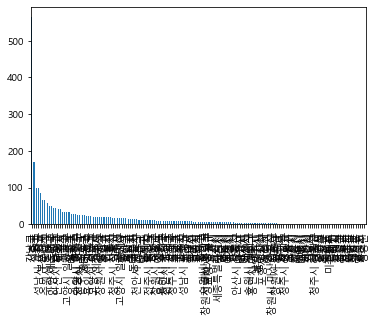

In [17]:
# 시각성이 너무 좋지 않아 bar로 보는거 보다 scattr를 이용한 분포를 보는게 좋을 거 같다.
df_hospital['시군구명'].value_counts().plot.bar()

### 위도와 경도 값 받아오기

In [23]:
df_hospital[['위도','경도']]

,위도,경도
8,37.522223,127.028531
18,35.146675,126.847333
31,37.537333,127.126507
44,37.485498,126.995334
60,35.155956,126.848849
...,...,...
90772,33.482304,126.484086
91013,35.098616,128.918038
91111,35.158144,129.057487
91112,37.522865,127.042042


## 데이터 시각화 

### plot.scatter

<AxesSubplot:xlabel='경도', ylabel='위도'>

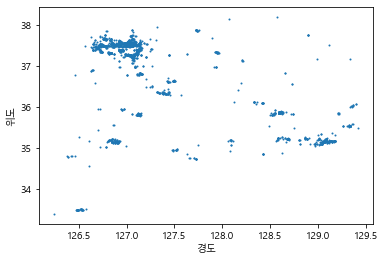

In [19]:
#plot.scattr로 시각화 해보기
df_hospital[['위도','경도']].plot.scatter(x= '경도',y ='위도',s=1)
#서울 쪽에 몰려 있고 그 중 강남 쪽에 모여있는 것을 볼 수 있어

### seaborn 

<AxesSubplot:xlabel='경도', ylabel='위도'>

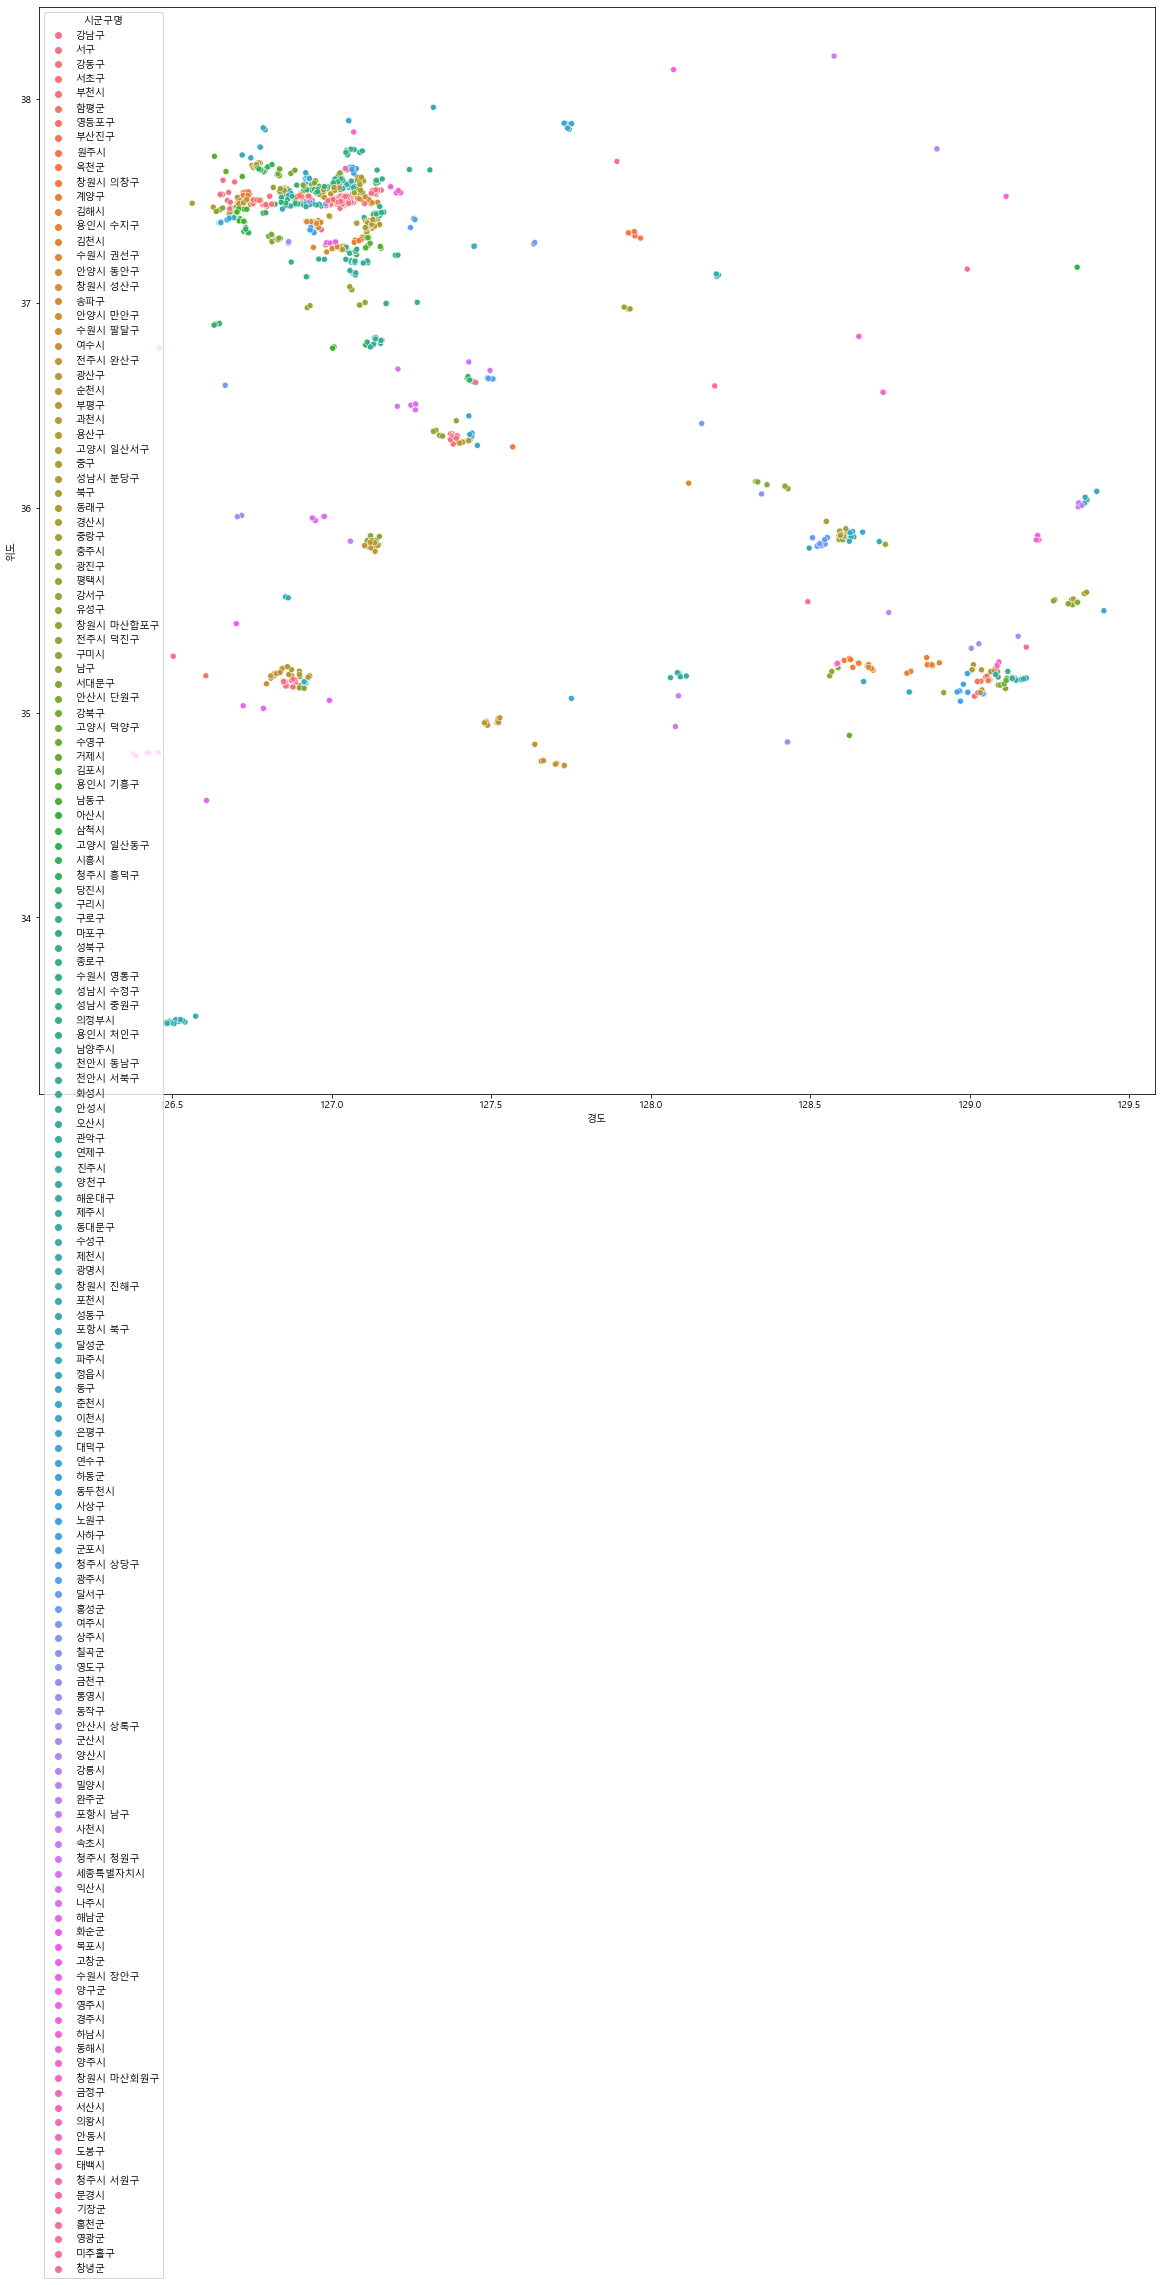

In [20]:
#seaborn 이용하기
plt.figure(figsize = (20,20))
sns.scatterplot(data = df_hospital,x = '경도', y = '위도', hue = '시군구명')

### folium

In [30]:
map = folium.Map(location = [df_hospital['위도'].mean(),df_hospital['경도'].mean()])
for n in df_hospital.index:
    name = df_hospital.loc[n,'상호명']
    address = df_hospital.loc[n,'도로명주소']
    popup = f"{name}-{address}"
    location = df_hospital.loc[n,'위도'],df_hospital.loc[n,'경도']
    folium.Marker(location = location, popup = popup).add_to(map)
map    